# Library

In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
from os import listdir

from PIL import Image
from sklearn import metrics
import tensorflow as tf

import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

# Data Information

In [2]:
path = '/kaggle/input/calo-images/Dataset Calories'
print('List dir:')
for file in os.listdir(path):
  print(file)

List dir:
Validation
Train


In [3]:
TRAIN_DIR = os.path.join(path, 'Train')
VALIDATION_DIR = os.path.join(path, 'Validation')

In [4]:
high_calories_train = os.path.join(TRAIN_DIR, 'High Calories')
medium_calories_train = os.path.join(TRAIN_DIR, 'Medium Calories')
low_calories_train = os.path.join(TRAIN_DIR, 'Low Calories')

high_calories_test = os.path.join(VALIDATION_DIR, 'High Calories')
medium_calories_test = os.path.join(VALIDATION_DIR, 'Medium Calories')
low_calories_test = os.path.join(VALIDATION_DIR, 'Low Calories')

print("High Calories Train Food images:", len(os.listdir(high_calories_train)))
print("Medium Calories Train Food images:", len(os.listdir(medium_calories_train)))
print("Low Calories Train Food images:", len(os.listdir(low_calories_train)))

print("High Calories Test Food images:", len(os.listdir(high_calories_test)))
print("Medium Calories Test Food images:", len(os.listdir(medium_calories_test)))
print("Low Calories Test Food images:", len(os.listdir(low_calories_test)))

High Calories Train Food images: 400
Medium Calories Train Food images: 400
Low Calories Train Food images: 400
High Calories Test Food images: 80
Medium Calories Test Food images: 70
Low Calories Test Food images: 80


# Display Images

In [5]:
def display_images(image_dir, title, num_images=9):
  image_files = os.listdir(image_dir)[:num_images]
  fig, axes = plt.subplots(3,3, figsize = (9,9))
  axes = axes.flatten()

  for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    try:
      img = Image.open(image_path)
      axes[i].imshow(img)
      axes[i].axis('off')
    except Exception as e:
      print(f"Error opening {image_path}: {e}")

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

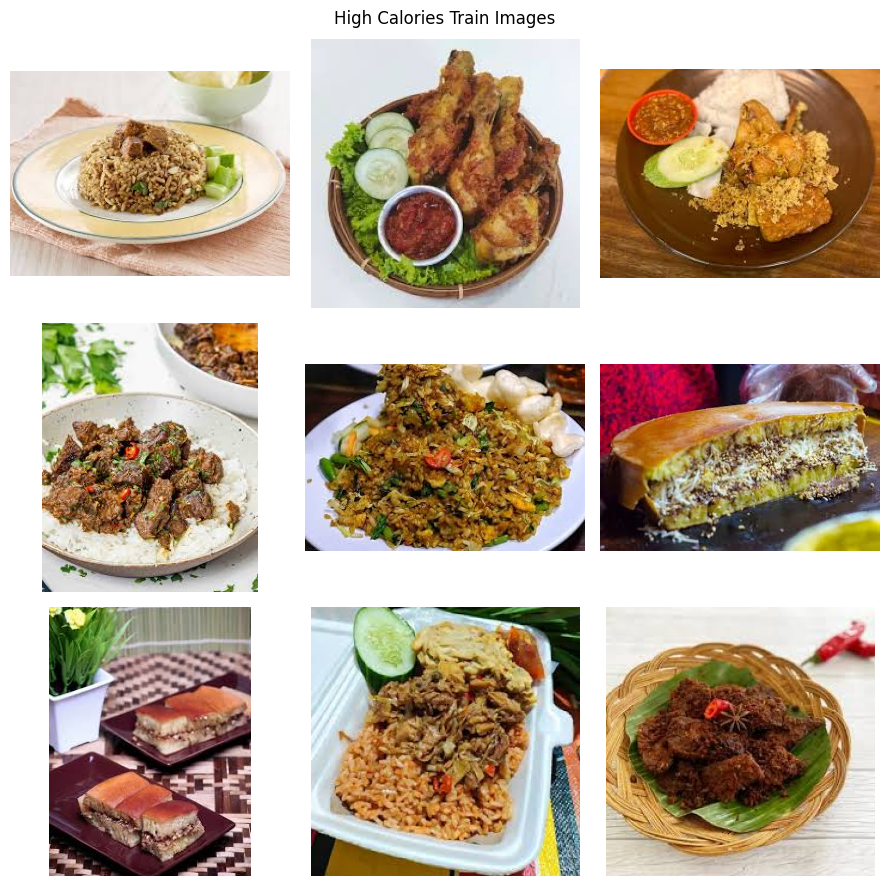

In [6]:
display_images(high_calories_train, 'High Calories Train Images')

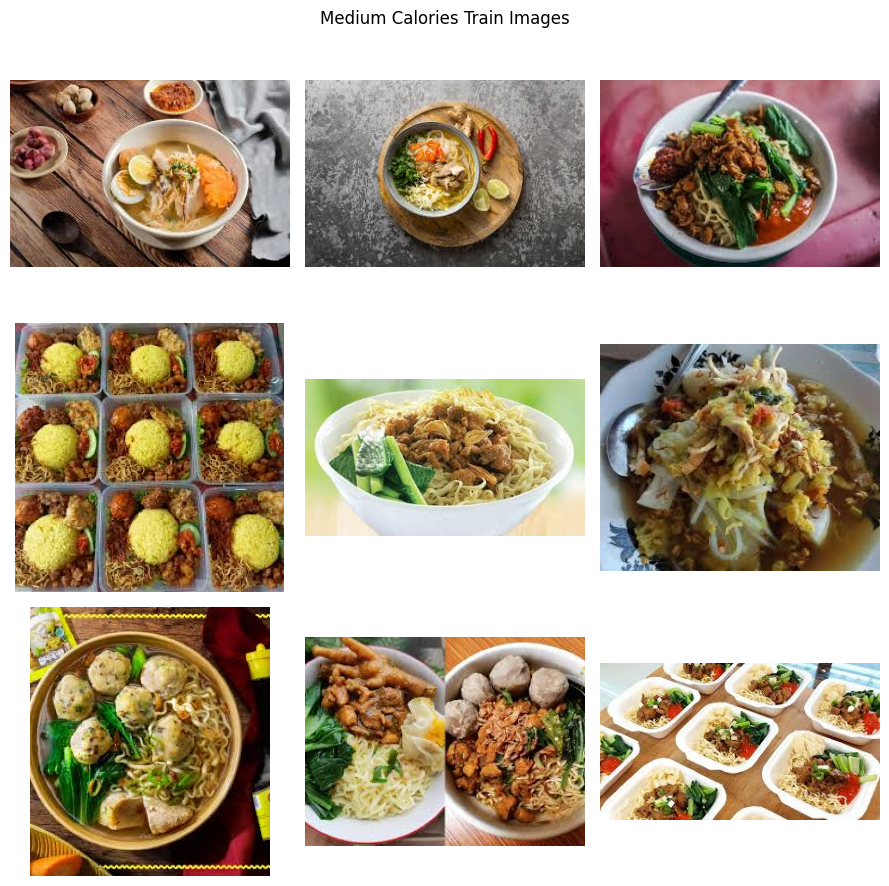

In [7]:
display_images(medium_calories_train, 'Medium Calories Train Images')

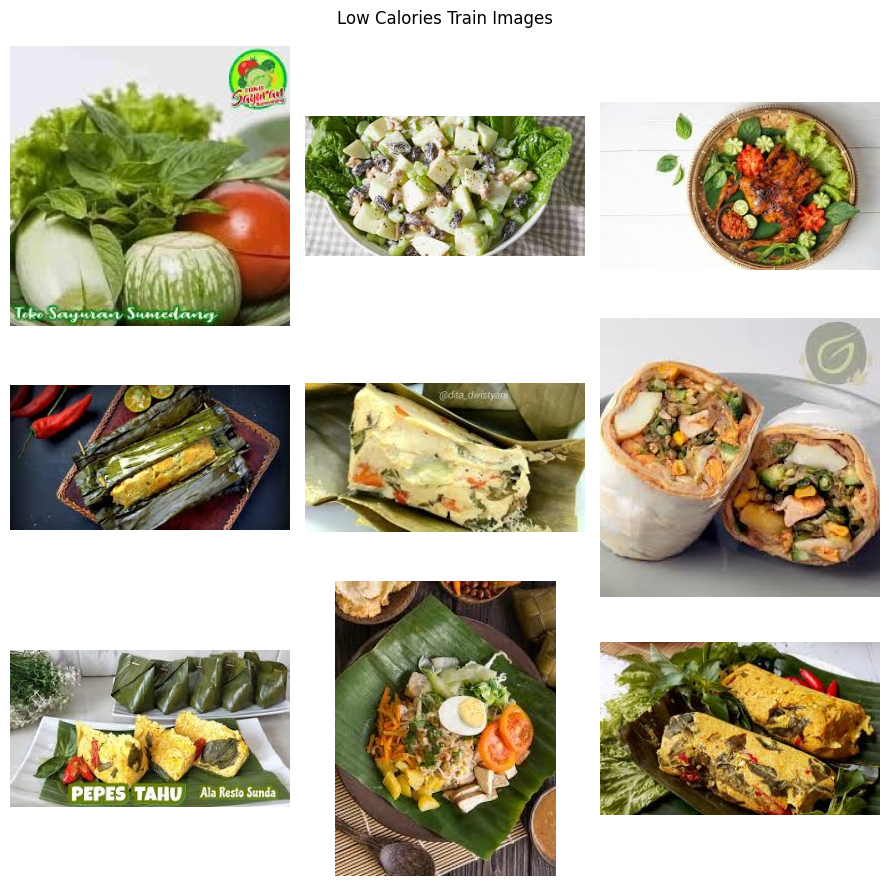

In [8]:
display_images(low_calories_train, 'Low Calories Train Images')

# Data Augmentation

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [10]:
training_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
)

validation_data = valid_datagen.flow_from_directory(
    VALIDATION_DIR,
    class_mode="categorical",
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
)

Found 1200 images belonging to 3 classes.
Found 230 images belonging to 3 classes.


# Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,718,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,402,435 (20.61 MB)

 Trainable params: 5,402,435 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6
)

In [13]:
history = model.fit(training_data,epochs=15,
                    validation_data=validation_data,
                    callbacks=[reduce_lr])

Epoch 1/15


I0000 00:00:1733144278.870856      81 service.cc:145] XLA service 0x7db938002080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733144278.870930      81 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/38 ━━━━━━━━━━━━━━━━━━━━ 5:53 10s/step - accuracy: 0.3125 - loss: 1.0976

I0000 00:00:1733144283.721546      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 444ms/step - accuracy: 0.3413 - loss: 1.1036 - val_accuracy: 0.5304 - val_loss: 1.0048 - learning_rate: 1.0000e-04
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 281ms/step - accuracy: 0.5181 - loss: 0.9852 - val_accuracy: 0.5870 - val_loss: 0.8714 - learning_rate: 1.0000e-04
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.5941 - loss: 0.8471 - val_accuracy: 0.6043 - val_loss: 0.8532 - learning_rate: 1.0000e-04
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 282ms/step - accuracy: 0.6647 - loss: 0.7811 - val_accuracy: 0.5957 - val_loss: 0.8503 - learning_rate: 1.0000e-04
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.6776 - loss: 0.7793 - val_accuracy: 0.6478 - val_loss: 0.8307 - learning_rate: 1.0000e-04
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 281ms/step - accuracy: 0.6445 - loss: 0.8060 - val_accuracy: 0.6739 - val_loss: 0.8066 - learning_rate: 1.0000e-04
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.68

# Predictions

In [14]:
def plot_predictions(model, dataset, class_names, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()
    counter = 0

    for batch_x, batch_y in dataset:
        for image, label in zip(batch_x, batch_y):  
            predictions = model.predict(tf.expand_dims(image, axis=0), verbose=0)
            predicted_label = np.argmax(predictions, axis=-1)
            true_label = np.argmax(label, axis=-1)

            axes[counter].imshow(image)  
            axes[counter].set_title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label[0]]}")
            axes[counter].axis("off")
            counter += 1
            
            if counter >= num_images:
                break
        if counter >= num_images:
            break

    plt.tight_layout()
    plt.show()

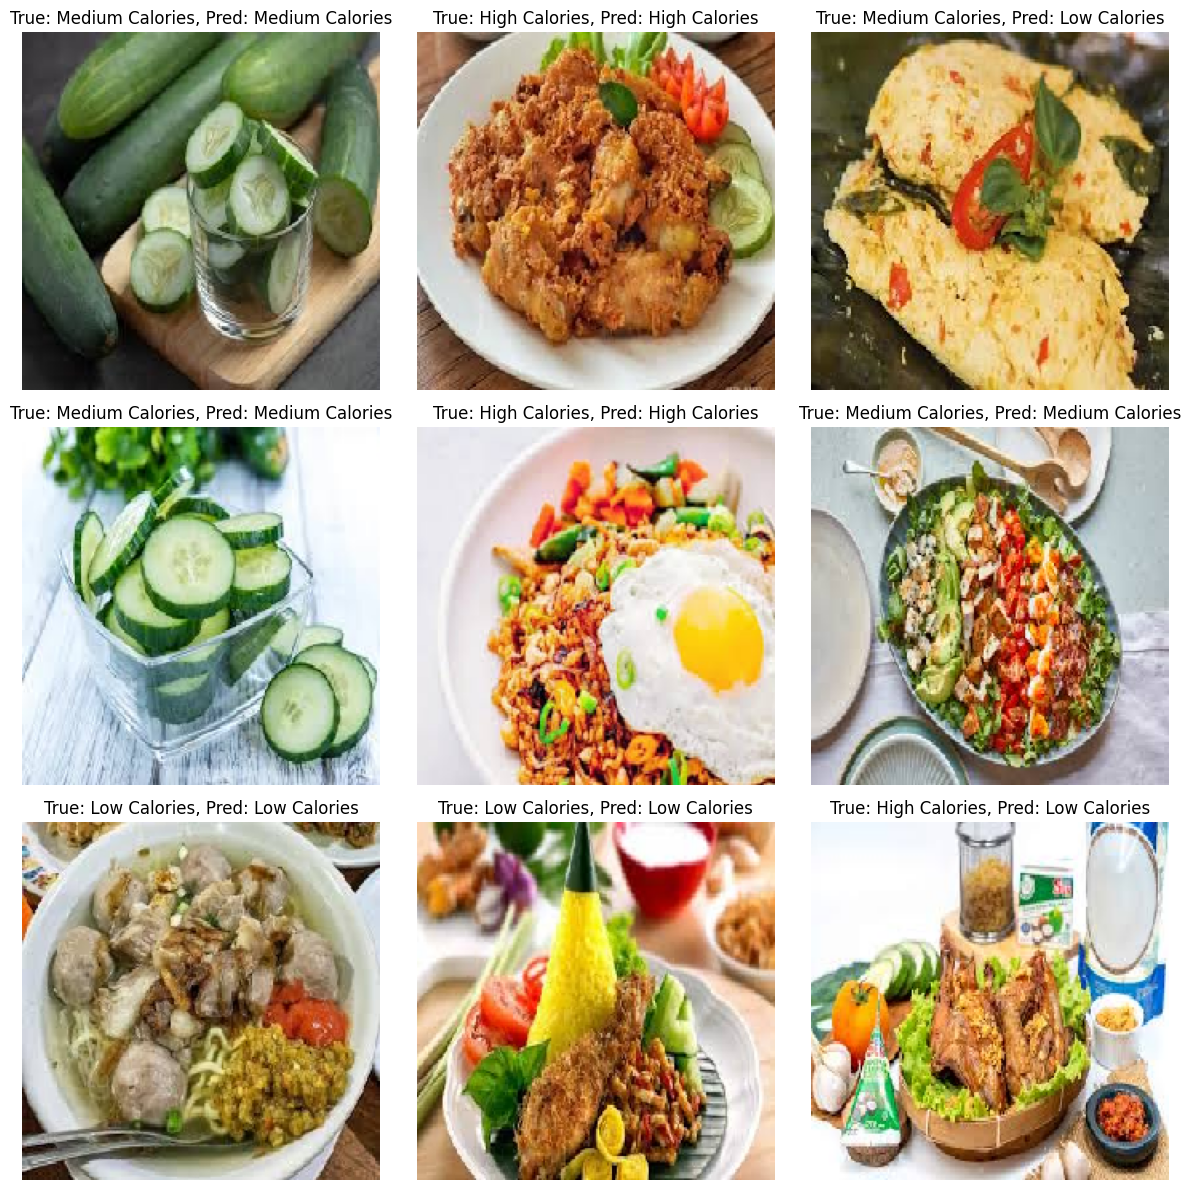

In [15]:
class_names = ['High Calories', 'Medium Calories', 'Low Calories']
plot_predictions(model=model, dataset=validation_data, class_names=class_names, num_images=9)

# Model Evaluation

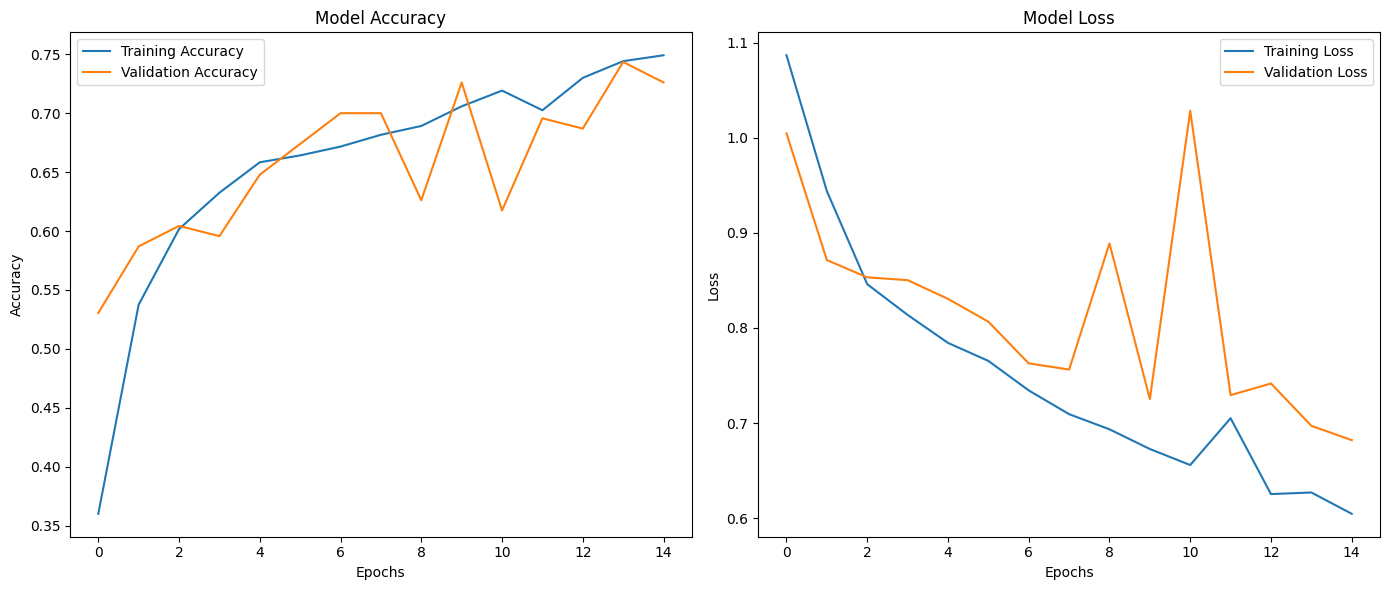

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Save Model

In [17]:
model.save("model_Calories Image Multiclassification.h5")

In [18]:
model_json = model.to_json()
with open("model_Calories Image Multiclassification_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [19]:
weights = model.get_weights()
with open('model_Calories Image Multiclassification_weights.bin', 'wb') as bin_file:
    for weight_array in weights:
        weight_array.astype(np.float32).tofile(bin_file)